# Steam linear regression:

# Regularizing the features:

In [51]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import pickle

import math

# sklearn imports
from sklearn import pipeline, feature_selection, model_selection, linear_model, preprocessing

plt.rcParams['figure.dpi'] = 300
sns.set_style("darkgrid")

### Loading in all the data from the previous notebooks:

In [3]:
# Getting back the objects:
with open('objs_steam_data.pkl', 'rb') as f:
    y, X, steam_combined, steamDB_users_df_fuzzy_final, steamDB_users_df_fuzzy, steamDB_users_df, steam_combined_expanded, steam_combined_fuzzy = pickle.load(f)
f.close()

In [4]:
with open('X.pkl', 'rb') as f:
    X = pickle.load(f)
f.close()

with open('y.pkl', 'rb') as f:
    y = pickle.load(f)
f.close()

with open('steam_combined_expanded_fuzzy.pkl', 'rb') as f:
    steam_combined_expanded_fuzzy = pickle.load(f)
f.close()

In [8]:
x = X
#y = y[:,1] # getting rid of the index in my y
y.head()

0    1951
1    3879
2     189
3      36
4    2002
Name: All_Time_Peak_concurrent_users, dtype: int64

# Data

Using data from Steam


In [9]:
#df_ames = pd.read_csv("~/.kaggle/competitions/house-prices-advanced-regression-techniques/train.csv")
steam_combined_expanded_fuzzy.head()

,Developer,Genre,Publisher,Release_Date,Title,app_id,app_name,discount_price,early_access,esrb,...,violentmature_reasons_new,visit,withmature_reasons_new,Intercept,esrb[T.e],esrb[T.m],esrb[T.nr],esrb[T.r],esrb[T.t],early_access[T.True]
0,[WTFOMGames],"[Action, Adventure, Casual, Indie]",[WTFOMGames],"Mar 1, 2016",! That Bastard Is Trying To Steal Our Gold !,449940,! That Bastard Is Trying To Steal Our Gold !,3.99,False,nr,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,[Beatshapers],"[Action, Indie]","[8Floor, Beatshapers]","Aug 10, 2016",#KILLALLZOMBIES,303720,#KILLALLZOMBIES,4.99,False,t,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,[Paleno Games],"[Casual, Indie]",[Paleno Games],"May 5, 2017",#monstercakes,614910,#monstercakes,0.99,False,nr,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,[Eko],"[Adventure, Indie]",[Eko],"Mar 14, 2018",#WarGames,779420,#WarGames,2.99,False,nr,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,[BeHappy Studios],"[Action, Casual, Indie]",[Back To Basics Gaming],"Jul 28, 2016",$1 Ride,508290,$1 Ride,0.98,False,nr,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
x.head()

,discount_price,metascore,overall_rev_pos_perc,overall_reviews_n,price,recent_rev_pos_perc,recent_reviews_n,steam_Achievement_n,1980s,1990,...,violentmature_reasons_new,visit,withmature_reasons_new,Intercept,esrb[T.e],esrb[T.m],esrb[T.nr],esrb[T.r],esrb[T.t],early_access[T.True]
0,3.99,0.0,46,15,3.99,0,NaN,0,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.99,0.0,47,19,4.99,0,NaN,10,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.99,0.0,90,272,0.99,80,NaN,18,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.99,0.0,66,54,2.99,0,NaN,55,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.98,0.0,58,80,0.98,0,NaN,0,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Cleaning up number of features by removing features with very low number of observations (<10):

In [11]:
# remove columns with low values (sum<10)

print('number of observations:', len(x))
print('number of features:', len(x.columns))

x.drop([col for col, val in x.sum().iteritems() if val < 10], axis=1, inplace=True)

# add intercept back in
x['Intercept'] = 1.0 

print('number of features after removing columns with low values:',len(x.columns))

number of observations: 7295
number of features: 9855
number of features after removing columns with low values: 844


In [12]:
x.head()

,discount_price,metascore,overall_rev_pos_perc,overall_reviews_n,price,recent_rev_pos_perc,recent_reviews_n,steam_Achievement_n,1980s,1990,...,users,violence,violentmature_reasons_new,Intercept,esrb[T.e],esrb[T.m],esrb[T.nr],esrb[T.r],esrb[T.t],early_access[T.True]
0,3.99,0.0,46,15,3.99,0,NaN,0,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.99,0.0,47,19,4.99,0,NaN,10,0,0,...,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.99,0.0,90,272,0.99,80,NaN,18,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.99,0.0,66,54,2.99,0,NaN,55,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.98,0.0,58,80,0.98,0,NaN,0,0,0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### OLS with cross-validation:

In [14]:
OLS_pipe = pipeline.Pipeline(
    # some features have missing values so this fills in the mean for them
    # this imputer is lazy and often helpful but not always the best option
    [("imp", preprocessing.Imputer()), 
     # this removes zero variance features:
     ("var", feature_selection.VarianceThreshold()),
     # scale our features before linear models. it's good data hygiene 
     ("std", preprocessing.StandardScaler()),
     # our old friend <3
     ("lin", linear_model.LinearRegression())
    ])

In [15]:
cv_y = y

cv_result = model_selection.cross_validate(
        OLS_pipe, X=np.nan_to_num(x), y=cv_y, cv=10, return_train_score=True)
print(f"train: {np.mean(cv_result['train_score']):.3}, test: {np.mean(cv_result['test_score']):.3}")

train: 0.413, test: -5.95e+25


### OLS with cross-validation and select K-best features:

In [18]:
select_pipe = pipeline.Pipeline(
    # some features have missing values so this fills in the mean for them
    # this imputer is lazy and often helpful but not always the best option
    [("imp", preprocessing.Imputer()), 
     # this removes zero variance features:
     ("var", feature_selection.VarianceThreshold()),
     # scale our features before linear models. it's good data hygiene 
     ("std", preprocessing.StandardScaler()),
     # we'll use select k best to adjust model complexity
     ("select",
      feature_selection.SelectKBest(k=10,
          score_func=feature_selection.f_regression)), 
     # our old friend <3
     ("lin", linear_model.LinearRegression())
    ])

In [19]:
select_pipe.get_params()

{'memory': None,
 'steps': [('imp',
   Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
  ('var', VarianceThreshold(threshold=0.0)),
  ('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('select',
   SelectKBest(k=10, score_func=<function f_regression at 0x1a0905dc80>)),
  ('lin',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))],
 'imp': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'var': VarianceThreshold(threshold=0.0),
 'std': StandardScaler(copy=True, with_mean=True, with_std=True),
 'select': SelectKBest(k=10, score_func=<function f_regression at 0x1a0905dc80>),
 'lin': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'imp__axis': 0,
 'imp__copy': True,
 'imp__missing_values': 'NaN',
 'imp__strategy': 'mean',
 'imp__verbose': 0,
 'var__threshold': 0.0,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'select__k': 10,


In [21]:
select_y=np.log(y)

# now it's just
select_pipe.fit(x,select_y)
select_pipe.score(x,select_y)

0.4470857220413196

In [22]:
select_pred = select_pipe.predict(x)

In [24]:
# first find out which fetures were selected
feat_support_var = select_pipe.named_steps["var"].get_support()
feat_var = x.columns[feat_support_var]

select_support = select_pipe.named_steps["select"].get_support()
select_feat = feat_var[select_support]

coef = select_pipe.named_steps["lin"].coef_

list(zip(select_feat, coef))

[('metascore', 0.35191321764886785),
 ('recent_rev_pos_perc', 0.5427651876621874),
 ('co', 0.06471729618599727),
 ('multiplayer', 0.44041114779194246),
 ('op', 0.06471729618599707),
 ('open', 0.20732552893908276),
 ('person', 0.12486045021661757),
 ('singleplayer', 0.2207162479411279),
 ('cards', 0.30148250975401025),
 ('tradingspecs_new', 0.3014825097540103)]

Okay, how do we diagnose overfitting? Well the very first step is to look at cross validated train vs test performance. Let's keep everything at its defaults and see how we do. 

In [26]:
cv_y = np.log(y)

cv_result = model_selection.cross_validate(
        select_pipe, X=x, y=cv_y, cv=10, return_train_score=True)
print(f"train: {np.mean(cv_result['train_score']):.3}, test: {np.mean(cv_result['test_score']):.3}")

train: 0.446, test: 0.442


In [27]:
test_train_y = np.log(y)
x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)

In [97]:
select_pred = select_pipe.predict(x_test)
select_pipe.score(x_test, y_test)

0.4749983731415157

In [92]:
# calculate r-squared for a log(y)

select_pred = select_pipe.predict(x_test)

y_pred = np.exp(select_pred)

ybar = np.mean(np.exp(y_test))
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((np.exp(y_test) - ybar)**2)
rsquared = SSR / SST
print(rsquared, SSR, SST)

0.009050565522038539 18300572208.346275 2022036320689.9666


Okay, they're pretty darn close. Maybe that means we're underfit (adding model complexity would help us). Maybe that means we're perfect. Only way to find out is to look at a learning curve

In [72]:
figsize(15, 8)


train_scores = []
test_scores = []
# define feature range
num_feats = len(x.columns)
feat_range = np.arange(1, num_feats, 10)+1
# for each k in feat_range
for num_f in feat_range:
    # set pipeline params
    select_pipe.set_params(select__k=num_f)
    # get cross val scores
    cv_result = model_selection.cross_validate(
        select_pipe, X=x, y=y, cv=10, return_train_score=True)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))
    print(f"feature {num_f} done")

# plot test vs train
plot(feat_range, train_scores, label="train")
plot(feat_range, test_scores, label="test")

# find index of best score
best_i = np.argmax(test_scores)
# annotate score
ann_xy = (feat_range[best_i], test_scores[best_i])
ann_text = f"$r^2$={test_scores[best_i]:.2}, $k$={feat_range[best_i]}"
annotate(ann_text, xy=ann_xy, xytext=(.6,.4), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )

xlabel("k in select k best")
ylabel("$r^2$, clipped to [0,1]")
title("learning curve")
legend();

feature 1 done
feature 2 done
feature 3 done
feature 4 done
feature 5 done
feature 6 done
feature 7 done
feature 8 done
feature 9 done
feature 10 done
feature 11 done
feature 12 done
feature 13 done
feature 14 done
feature 15 done
feature 16 done
feature 17 done
feature 18 done
feature 19 done
feature 20 done
feature 21 done
feature 22 done
feature 23 done
feature 24 done
feature 25 done
feature 26 done
feature 27 done
feature 28 done
feature 29 done
feature 30 done
feature 31 done
feature 32 done
feature 33 done
feature 34 done
feature 35 done
feature 36 done
feature 37 done
feature 38 done
feature 39 done
feature 40 done
feature 41 done
feature 42 done
feature 43 done
feature 44 done
feature 45 done
feature 46 done
feature 47 done
feature 48 done
feature 49 done
feature 50 done
feature 51 done
feature 52 done
feature 53 done
feature 54 done
feature 55 done
feature 56 done
feature 57 done
feature 58 done
feature 59 done
feature 60 done
feature 61 done
feature 62 done
feature 63 done
f

KeyboardInterrupt: 

Is this overfit? Idk, you tell me. It's difficult to say if adding more features would worsen test performance or not.

In a case like this, looking at feature selection or regularization might help, or doing the opposite and adding new features might help, but it's also possible that neither will.

Let's add a whole bunch of features and see

In [ ]:
%matplotlib inline

# load the R package ISLR
infert = com.importr("ISLR")

# load the Auto dataset
auto_df = com.load_data('Auto')

plot_df = 

# calculate the correlation matrix
corr = auto_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [60]:
steam_combined_expanded_fuzzy_test = steam_combined_expanded_fuzzy.copy()
steam_combined_expanded_fuzzy_test.drop([col for col, val in steam_combined_expanded_fuzzy_test.sum().iteritems() if val < 10], axis=1, inplace=True)

7295

In [61]:
len(steam_combined_expanded_fuzzy_test.columns)

871

In [ ]:
steam_combined_expanded_fuzzy[column].sum()<10

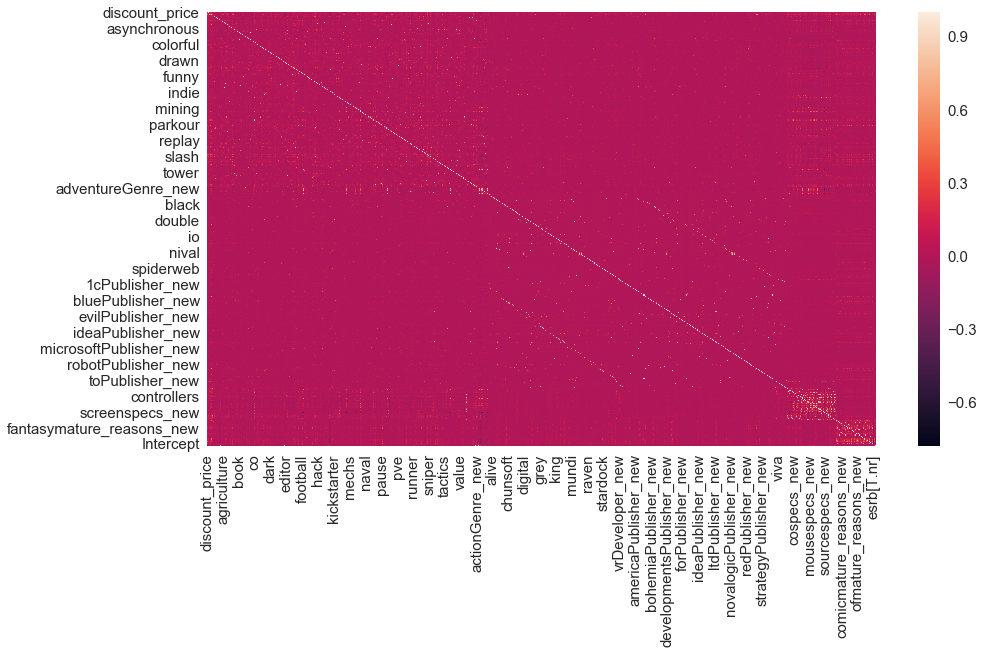

In [292]:
#plot_df=steam_combined_expanded_fuzzy.select_dtypes(include=['int64','float64']).iloc[:,1:200]
plot_df=x.select_dtypes(include=['int64','float64'])

#plot_df = plot_df.drop(['fuzzy_score'], axis=1)
plot_df.head()
sns.heatmap(plot_df.corr())

In [304]:
steam_combined_expanded_fuzzy.discount_price = steam_combined_expanded_fuzzy.discount_price.astype(float)

In [309]:
steam_combined_expanded_fuzzy.discount_price.head()

0    3.99
1    4.99
2    0.99
3    2.99
4    0.98
Name: discount_price, dtype: float64

In [307]:
steam_combined_expanded_fuzzy.recent_reviews_n = steam_combined_expanded_fuzzy.recent_reviews_n.str.replace(',','').astype(float)

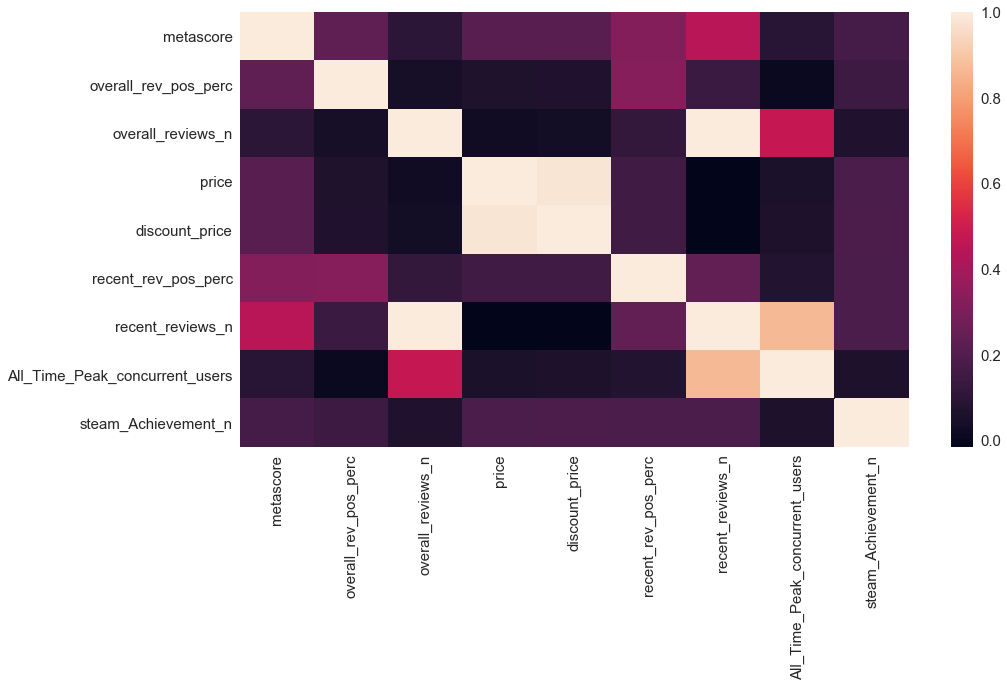

In [314]:
plot_df=steam_combined_expanded_fuzzy.select_dtypes(include=['int64','float64'])
#plot_df = plot_df.drop(['fuzzy_score'], axis=1)
plot_df = plot_df[['metascore', 'overall_rev_pos_perc', 'overall_reviews_n','price','discount_price','recent_rev_pos_perc', 'recent_reviews_n','All_Time_Peak_concurrent_users','steam_Achievement_n']]

#plot_df=x.select_dtypes(include=['int64','float64'])

plot_df.head()
sns.heatmap(plot_df.corr())

## Visualizing Overfitting: The need for Regularization

Now let's look at select k best when we have 300+ features!

In [204]:
# some of the NA columns we created have all zeros. this can cause errors 
# so we're introducing variance threshold to remove those columns
select_pipe = pipeline.Pipeline([
    ("imp", preprocessing.Imputer()),
    ("var", feature_selection.VarianceThreshold()),
    ("select", feature_selection.SelectKBest( score_func=feature_selection.f_regression)),
    ("std", preprocessing.StandardScaler()),
    ("lin", linear_model.LinearRegression())
])

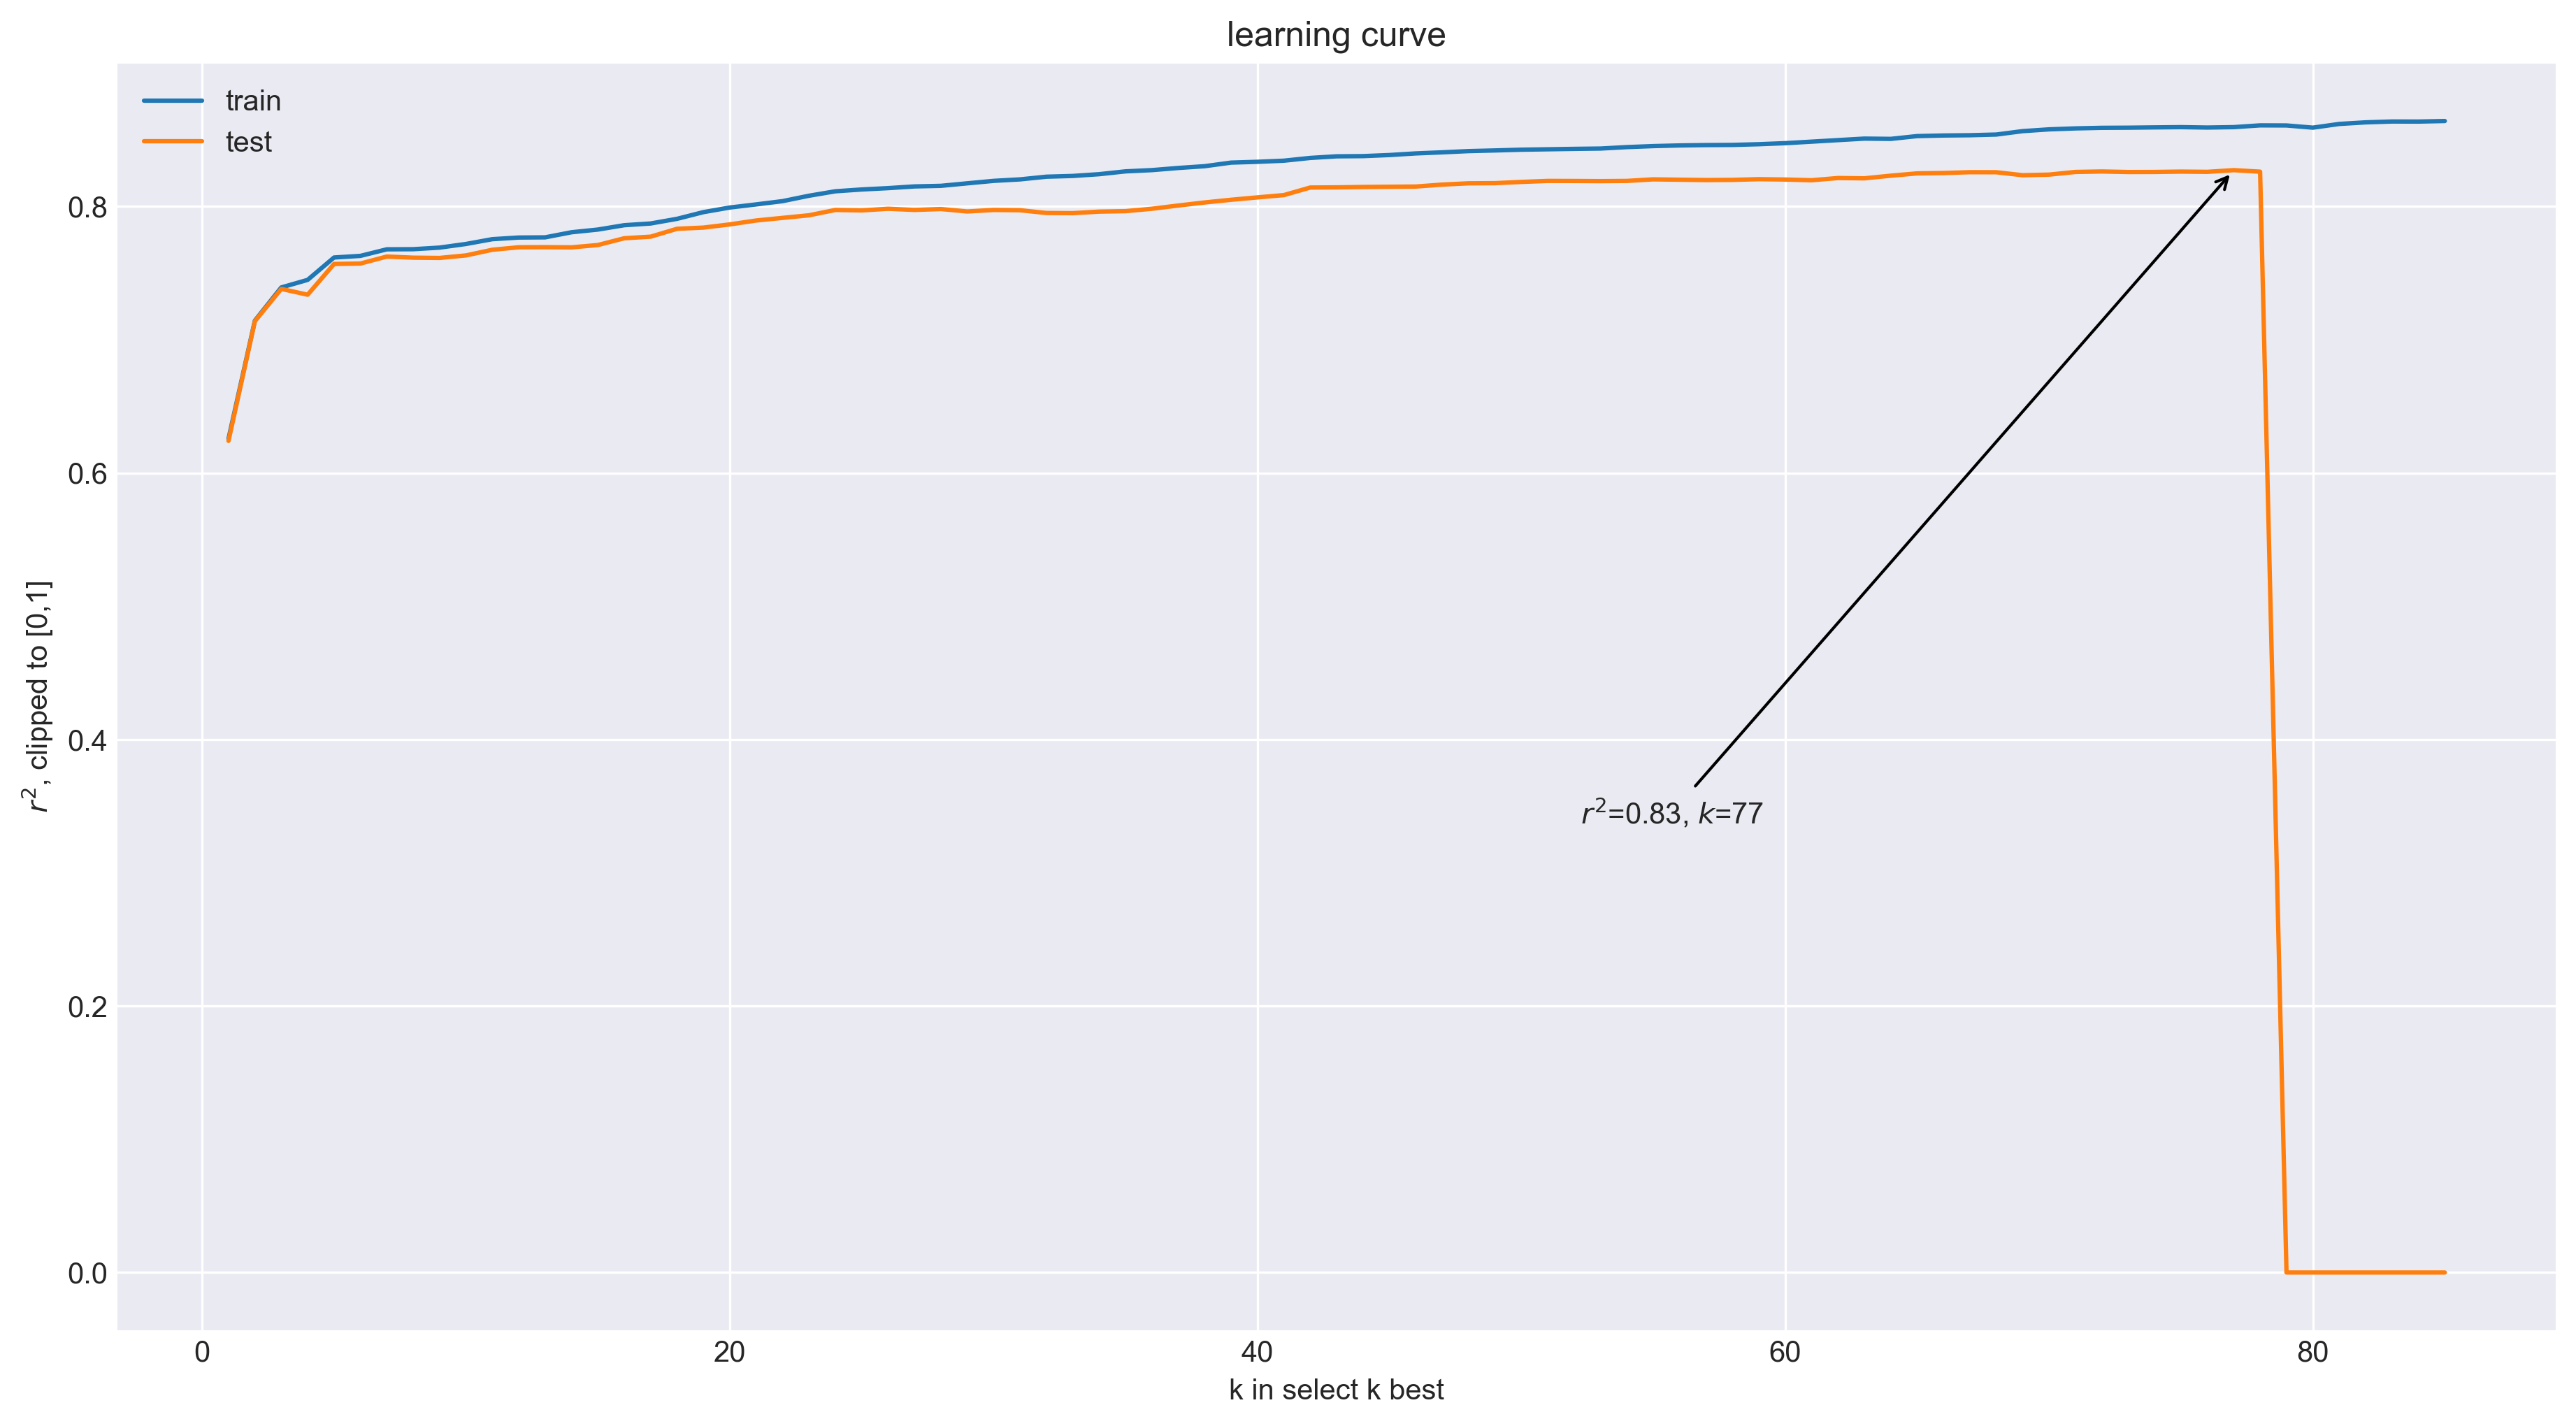

In [207]:
figsize(15, 8)

cv_y = np.log(y)

train_scores = []
test_scores = []
num_feats = 85
feat_range = np.arange(num_feats)+1
for num_f in feat_range:
    select_pipe.set_params(select__k=num_f)
    cv_result = model_selection.cross_validate(
        select_pipe, X=x, y=cv_y, cv=10, return_train_score=True)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))

best_i = np.argmax(test_scores)
# annotate score
ann_xy = (feat_range[best_i], test_scores[best_i])
ann_text = f"$r^2$={test_scores[best_i]:.2}, $k$={feat_range[best_i]}"
annotate(ann_text, xy=ann_xy, xytext=(.6,.4), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )    

plot(feat_range, train_scores, label="train")
plot(feat_range, test_scores, label="test")
xlabel("k in select k best")
ylabel("$r^2$, clipped to [0,1]")
title("learning curve")
legend();

### L2 Norm Regularization with Ridge:

In [35]:
ridge_pipe = pipeline.Pipeline([
     ("imp", preprocessing.Imputer()), 
     ("std", preprocessing.StandardScaler()),
     ("var", feature_selection.VarianceThreshold()), 
     ("ridge", linear_model.Ridge())
    ])

In [37]:
test_train_y = np.log(y)
x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)

In [38]:
# alphas look best when logspaced

# alphas 3 to 7 worked well for non-logged y

cv_y = np.log(y)

alphas_num=20
cv_num=10

alphas = np.logspace(-20, 9, num=alphas_num)
coefs_ridge = []
train_scores_ridge = []
test_scores_ridge = []

# loop through each of the 50 alphas
for i, alpha in enumerate(alphas):
    # set the alpha for our pipeline
    ridge_pipe.set_params(ridge__alpha=alpha)
    # cross validate and store the results
    cv_result_ridge = model_selection.cross_validate(
        ridge_pipe, X=x, y=cv_y, cv=cv_num, return_train_score=True)
    # use np.maximum(., 0) to make sure the scores don't go below zero (makes for ugly plots tbh)
    train_scores_ridge.append(np.maximum(np.mean(cv_result_ridge['train_score']), 0))
    test_scores_ridge.append(np.maximum(np.mean(cv_result_ridge['test_score']), 0))
    
    # fit again to grab coefficients
    ridge_pipe.fit(x_train, y_train)
    coefs_ridge.append(ridge_pipe.named_steps["ridge"].coef_)

In [39]:
print(alphas)

[1.00000000e-20 3.35981829e-19 1.12883789e-17 3.79269019e-16
 1.27427499e-14 4.28133240e-13 1.43844989e-11 4.83293024e-10
 1.62377674e-08 5.45559478e-07 1.83298071e-05 6.15848211e-04
 2.06913808e-02 6.95192796e-01 2.33572147e+01 7.84759970e+02
 2.63665090e+04 8.85866790e+05 2.97635144e+07 1.00000000e+09]


/Users/etheredgej/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


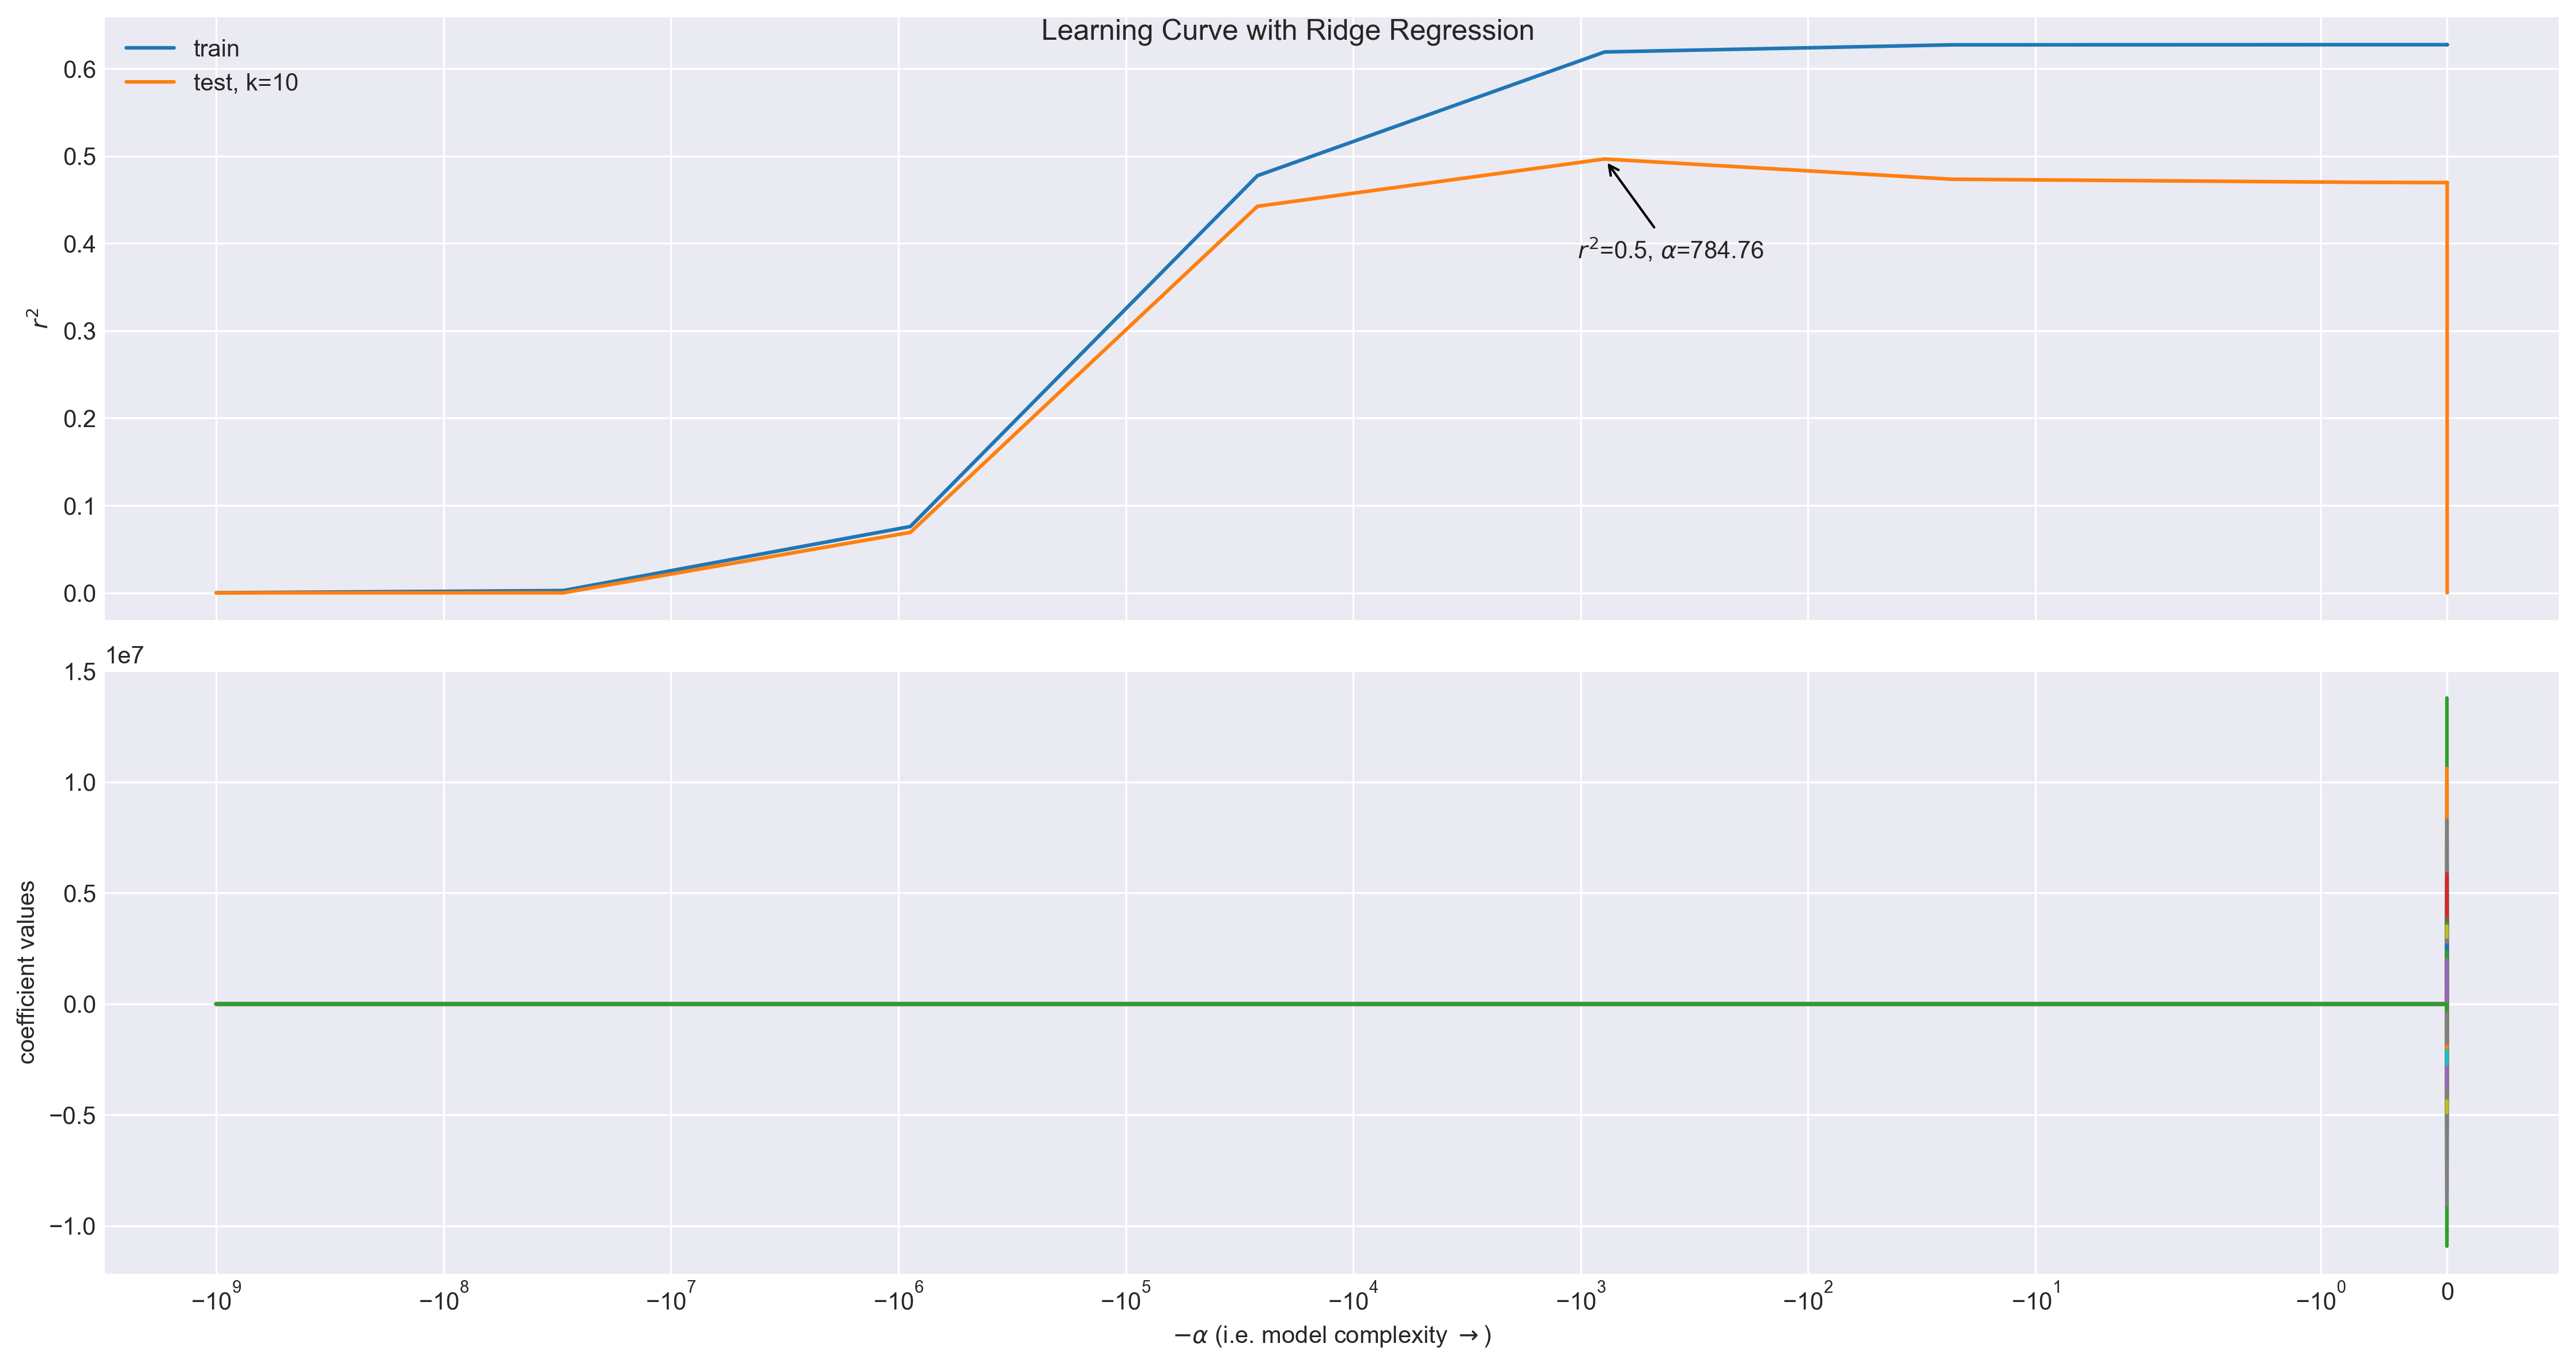

In [43]:
# set up the figure. I'll do the learning curve above and coefficient path below
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True, tight_layout=True)
# list of arrays -> single array
coef_arr = np.squeeze(coefs_ridge, axis=1)
# grab the first axis
ax0 = axes.flat[0]
# plot train and test curves
ax0.plot(-alphas, train_scores_ridge, label="train")
ax0.plot(-alphas, test_scores_ridge, label="test, k=10")
# find the index of the best score
best_ridge_i = np.argmax(test_scores_ridge)
# annotate score
ann_xy = (-alphas[best_ridge_i], test_scores_ridge[best_ridge_i])
ann_text = f"$r^2$={test_scores_ridge[best_ridge_i]:.2}, $\\alpha$={alphas[best_ridge_i]:g}"
ax0.annotate(ann_text, xy=ann_xy, xytext=(.6,.6), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )
ax0.set_ylabel("$r^2$")
ax0.legend()

# grab the second axis
ax1 = axes.flat[1]
ax1.plot(-alphas, coef_arr)
ax1.set_ylabel("coefficient values")
ax1.set_xlabel("$-\\alpha$ (i.e. model complexity $\\rightarrow$)")
fig.suptitle("Learning Curve with Ridge Regression")
plt.xscale("symlog")
plt.savefig("ridge.pdf")

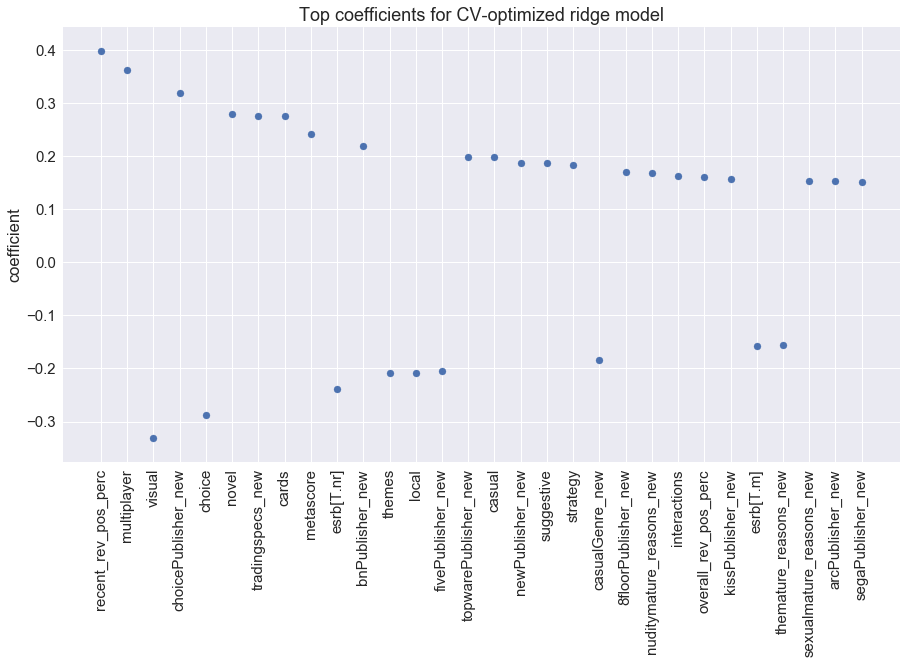

In [120]:
test_train_y = np.log(y)
x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)

ridge_pipe.set_params(ridge__alpha=alphas[best_ridge_i])
ridge_pipe.fit(x_train, y_train)
# pred = ridge_pipe.predict(x_test)
# score = ridge_pipe.score(x_test, y_test)

var_support = ridge_pipe.named_steps["var"].get_support()
feat = x.columns[var_support]
coef = ridge_pipe.named_steps["ridge"].coef_
sort_i = np.argsort(-np.abs(coef))

n_plot = 30
ind = np.arange(n_plot)

plt.figure(figsize=(15,8))
plt.scatter(ind, coef[sort_i][:n_plot])
plt.xticks(ind, feat[sort_i][:n_plot], rotation=90);
plt.title("Top coefficients for CV-optimized ridge model")
plt.ylabel("coefficient");

In [121]:
# Now show the log-y r-squared

# rsquared = 1-SSE/SST = SSR/SST

pred = ridge_pipe.predict(x_test)

y_pred = np.exp(pred)

ybar = np.mean(np.exp(y_test))
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((np.exp(y_test) - ybar)**2)
rsquared = SSR / SST
print(rsquared, SSR, SST)

0.5285789553377258 594998117381.3906 1125656084815.6118


In [122]:
from sklearn.metrics import r2_score

r2_score(np.exp(y_test), y_pred)

0.6111668080339123

In [127]:
calc_scores=[]
for i in range(10):
    test_train_y = np.log(y)
    x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)

    ridge_pipe.set_params(ridge__alpha=alphas[best_ridge_i])
    ridge_pipe.fit(x_train, y_train)
    pred = ridge_pipe.predict(x_test)

    print(r2_score(np.exp(y_test), np.exp(pred)))
    
    calc_scores.append(r2_score(np.exp(y_test), np.exp(pred)))
    
print('Average R^2:', np.mean(calc_scores))

0.25439524201180697
0.06262374927479941
0.3436405747996578
0.004586820221573307
-622.6864237577483
-143712.28013622013
0.051405510011441446
-0.019884945782813412
0.001817637255529303
0.07236244000843017
Average R^2: -14433.419561295008


### L1 Norm Regularization with LASSO:

In [59]:
lasso_pipe = pipeline.Pipeline([
     ("imp", preprocessing.Imputer()), 
     ("std", preprocessing.StandardScaler()),
     ("var", feature_selection.VarianceThreshold()), 
     ("lasso", linear_model.Lasso())
    ])

In [60]:
test_train_y = np.log(y)
x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)

In [157]:
# alphas look best when logspaced

# alphas between 4 and 5 (between 4.25 and 4.5) worked for non-logged y

cv_y = np.log(y)

alphas_num=20
cv_num=10

alphas = np.logspace(-10, 0, num=alphas_num)
coefs = []
train_scores = []
test_scores = []

# loop through each of the 50 alphas
for i, alpha in enumerate(alphas):
    # set the alpha for our pipeline
    lasso_pipe.set_params(lasso__alpha=alpha)
    # cross validate and store the results
    cv_result = model_selection.cross_validate(
        lasso_pipe, X=x, y=cv_y, cv=cv_num, return_train_score=True)
    # use np.maximum(., 0) to make sure the scores don't go below zero (makes for ugly plots tbh)
    train_scores.append(np.maximum(np.mean(cv_result['train_score']), 0))
    test_scores.append(np.maximum(np.mean(cv_result['test_score']), 0))
    
    # fit again to grab coefficients
    lasso_pipe.fit(x_train, y_train)
    coefs.append(lasso_pipe.named_steps["lasso"].coef_)

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/etheredgej/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


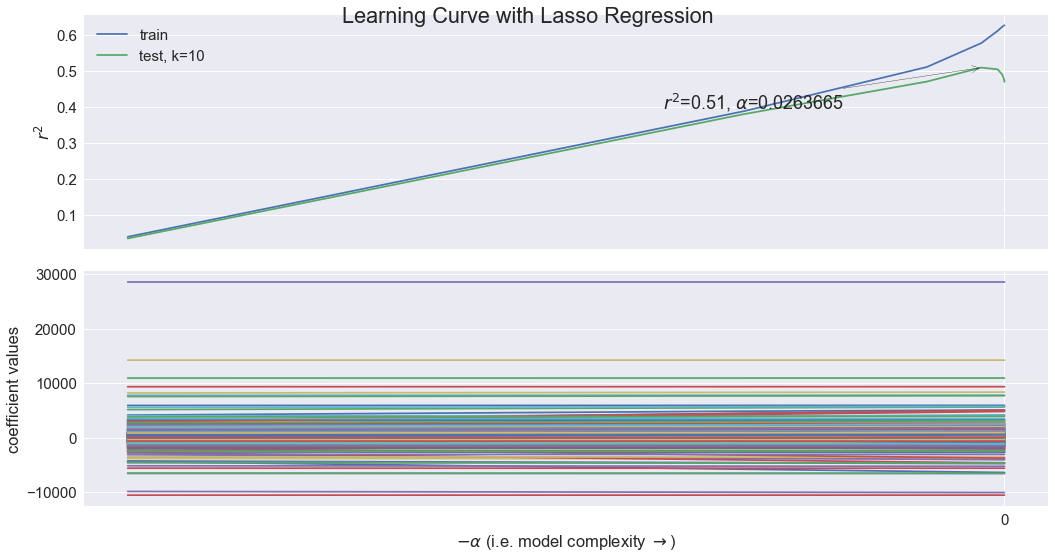

In [158]:
sns.set(font_scale=1.5)

# set up the figure. I'll do the learning curve above and coefficient path below
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True, tight_layout=True)
# list of arrays -> single array
coef_arr = np.squeeze(coefs, axis=1)
# grab the first axis
ax0 = axes.flat[0]
# plot train and test curves
ax0.plot(-alphas, train_scores, label="train")
ax0.plot(-alphas, test_scores, label="test, k=10")
# find the index of the best score
best_i = np.argmax(test_scores)
# annotate score
ann_xy = (-alphas[best_i], test_scores[best_i])
ann_text = f"$r^2$={test_scores[best_i]:.2}, $\\alpha$={alphas[best_i]:g}"
ax0.annotate(ann_text, xy=ann_xy, xytext=(.6,.6), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            )
ax0.set_ylabel("$r^2$")
ax0.legend()

# grab the second axis
ax1 = axes.flat[1]
ax1.plot(-alphas, coef_arr)
ax1.set_ylabel("coefficient values")
ax1.set_xlabel("$-\\alpha$ (i.e. model complexity $\\rightarrow$)")
fig.suptitle("Learning Curve with Lasso Regression")
plt.xscale("symlog")
plt.savefig("lasso.pdf")

In [67]:
coefs[0][0:20]

array([ 0.01099861,  0.2092873 ,  0.16326082,  0.08782291,  0.05404645,
        0.40176299,  0.01632115,  0.09947855, -0.0122764 ,  0.0155892 ,
        0.04887834,  0.03338564,  0.03889476,  0.04230802, -0.00215231,
       -0.05381487, -0.00934781, -0.04864511,  0.02039004,  0.13161703])

In [68]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(Ridge(), np.isfinite(x), np.log(y), "alpha", np.logspace(-10, -5, 3))

In [69]:
print(train_scores)

[[0.00185688 0.00183494 0.00077485]
 [0.00185688 0.00183494 0.00077485]
 [0.00185688 0.00183494 0.00077485]]


In [70]:
print(valid_scores)

[[-0.00074955 -0.00135062  0.00223902]
 [-0.00074955 -0.00135062  0.00223902]
 [-0.00074955 -0.00135062  0.00223902]]


0.5464588466325926


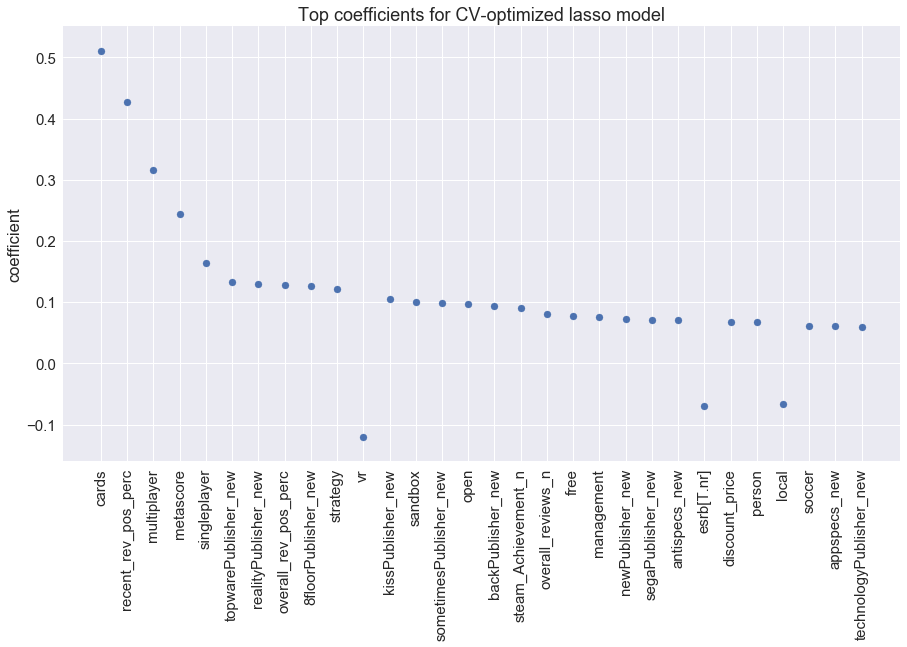

In [159]:
test_train_y = np.log(y)
x_train, x_test, y_train, y_test  = model_selection.train_test_split(x,test_train_y)
lasso_pipe.set_params(lasso__alpha=alphas[best_i])
lasso_pipe.fit(x_train, y_train)
pred = lasso_pipe.predict(x_test)
score = lasso_pipe.score(x_test, y_test)
print(score)

var_support = lasso_pipe.named_steps["var"].get_support()
feat = x.columns[var_support]
coef = lasso_pipe.named_steps["lasso"].coef_
sort_i = np.argsort(-np.abs(coef))

n_plot = 30
ind = np.arange(n_plot)

plt.figure(figsize=(15,8))
plt.scatter(ind, coef[sort_i][:n_plot])
plt.xticks(ind, feat[sort_i][:n_plot], rotation=90);
plt.title("Top coefficients for CV-optimized lasso model")
plt.ylabel("coefficient");

In [114]:
# Now show the log-y r-squared (back-transformed):

# rsquared = 1-SSE/SST = SSR/SST

lasso_pred = lasso_pipe.predict(x_test)

y_pred = np.exp(lasso_pred)

ybar = np.mean(np.exp(y_test))
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((np.exp(y_test) - ybar)**2)
rsquared = SSR / SST
print(rsquared, SSR, SST)

0.02758529898094685 323133403924.4821 11713971421795.0


In [116]:
from sklearn.metrics import r2_score

r2_score(np.exp(y_test), y_pred)

0.055276848082739916

In [78]:
lasso_pipe.set_params(lasso__alpha=alphas[best_i])

Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('var', VarianceThreshold(threshold=0.0)), ('lasso', Lasso(alpha=0.007847599703514624, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

### Poisson modeling:

#### Still working on this part; I want to determine a pseudo-R^2 value:

In [149]:
import pandas as pd
import statsmodels.api as sm

# Fit GLM in statsmodels using Poisson link function
model = sm.GLM(y, np.nan_to_num(x_train), family = Poisson())
model.fit()
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     All_Time_Peak_concurrent_users   No. Observations:                 7295
Model:                                        GLM   Df Residuals:                     6560
Model Family:                             Poisson   Df Model:                          734
Link Function:                                log   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:            -8.7828e+06
Date:                            Tue, 29 May 2018   Deviance:                   1.7513e+07
Time:                                    16:17:20   Pearson chi2:                 2.78e+07
No. Iterations:                                10   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0131      0.000     98.500      0.000       0.013       0.013
x2             0.0096   1.24e-05    775.379      0.000       0.010       0.010
x3            -0.0084   2.29e-05   -368.468      0.000      -0.008      -0.008
x4          2.579e-06    3.9e-09    661.893      0.000    2.57e-06    2.59e-06
x5            -0.0036      0.000    -27.374      0.000      -0.004      -0.003
x6             0.0089   1.41e-05    636.189      0.000       0.009       0.009
x7         -6.427e-05   3.76e-07   -171.015      0.000    -6.5e-05   -6.35e-05
x8             0.0064   1.79e-05    358.740      0.000       0.006       0.006
x9             0.6816      0.004    168.784      0.000       0.674       0.690
x10            0.8086      0.004    204.982      0.000       0.801       0.816
x11            0.0773      0.001     55.879      0.000       0.075       0.080
x12           -0.4511      0.005    -98.597      0.000      -0.460      -0.442
x13           -0.0002      0.003     -0.089      0.929      -0.006       0.005
x14            0.2654      0.003     89.839      0.000       0.260       0.271
x15            0.0687      0.004     18.272      0.000       0.061       0.076
x16           -1.7968      0.016   -115.456      0.000      -1.827      -1.766
x17            0.3745      0.008     44.134      0.000       0.358       0.391
x18            0.0059      0.000     20.085      0.000       0.005       0.006
x19            0.0933      0.001     95.654      0.000       0.091       0.095
x20           -0.1343      0.001   -130.307      0.000      -0.136      -0.132
x21            0.5079      0.005    111.718      0.000       0.499       0.517
x22            0.2504      0.002    114.693      0.000       0.246       0.255
x23           -0.1294      0.002    -64.629      0.000      -0.133      -0.125
x24            0.9271      0.003    275.264      0.000       0.920       0.934
x25           -0.0107      0.001    -17.497      0.000      -0.012      -0.010
x26            0.2405      0.002    140.676      0.000       0.237       0.244
x27           -0.0437      0.001    -54.419      0.000      -0.045      -0.042
x28           -0.1646      0.002    -79.946      0.000      -0.169      -0.161
x29            0.3203      0.004     79.805      0.000       0.312       0.328
x30           -0.3375      0.003   -105.560      0.000      -0.344      -0.331
x31            0.2157      0.004     56.884      0.000       0.208       0.223
x32           -2.2602      0.012   -183.031      0.000      -2.284      -2.236
x33            0.3762      0.001    399.839      0.000       0.374       0.378
x34           -0.0080      0.007     -1.092      0.275      -0.022       0.006
x35           -0.2551      0.003    -90.384      0.000      -0.261      -0.250
x36           -0.0532      0.012     -4.

In [153]:
x_train, x_test, y_train, y_test  = model_selection.train_test_split(np.nan_to_num(x),y)
model = sm.GLM(y_train, x_train, family = Poisson())
m = model.fit()
y_pred = m.predict(x_test)

In [154]:
ybar = np.mean(y_test)
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((y_test - ybar)**2)
rsquared = SSR / SST
print(rsquared, SSR, SST)

12.158600441327511 1981055243272.795 162934480233.35962


In [155]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-11.373336008267609

In [147]:
sm.GLM(y, np.nan_to_num(x), family = sm.families.Gaussian()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     All_Time_Peak_concurrent_users   No. Observations:                 7295
Model:                                        GLM   Df Residuals:                     6560
Model Family:                            Gaussian   Df Model:                          734
Link Function:                           identity   Scale:                      1.3726e+09
Method:                                      IRLS   Log-Likelihood:                -86707.
Date:                            Tue, 29 May 2018   Deviance:                   9.0040e+12
Time:                                    16:11:13   Pearson chi2:                 9.00e+12
No. Iterations:                                 6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           106.5396    173.400      0.614      0.539    -233.317     446.397
x2            47.9059     18.809      2.547      0.011      11.041      84.770
x3           -30.2696     20.438     -1.481      0.139     -70.327       9.788
x4             0.5549      0.015     36.955      0.000       0.526       0.584
x5           -22.1302    172.323     -0.128      0.898    -359.877     315.616
x6            -3.3006     17.607     -0.187      0.851     -37.810      31.209
x7            -0.2457      1.344     -0.183      0.855      -2.879       2.388
x8            85.2900     29.219      2.919      0.004      28.021     142.559
x9          5222.9500   6000.720      0.870      0.384   -6538.245     1.7e+04
x10         8142.9720   4905.595      1.660      0.097   -1471.817    1.78e+04
x11          645.1718   1781.043      0.362      0.717   -2845.608    4135.952
x12        -1199.5096   5631.020     -0.213      0.831   -1.22e+04    9837.087
x13        -3479.7492   6798.436     -0.512      0.609   -1.68e+04    9844.941
x14          656.9987   5178.707      0.127      0.899   -9493.080    1.08e+04
x15         -799.1302   5633.441     -0.142      0.887   -1.18e+04    1.02e+04
x16         4135.3148   1.05e+04      0.393      0.694   -1.65e+04    2.47e+04
x17          836.6870   7495.078      0.112      0.911   -1.39e+04    1.55e+04
x18         -627.7917    374.901     -1.675      0.094   -1362.584     107.001
x19         3366.6288   1696.533      1.984      0.047      41.485    6691.772
x20        -6122.8472   1742.932     -3.513      0.000   -9538.932   -2706.763
x21         4002.1354   6882.792      0.581      0.561   -9487.888    1.75e+04
x22          573.3390   4178.372      0.137      0.891   -7616.120    8762.798
x23          461.7886   3240.709      0.142      0.887   -5889.885    6813.462
x24         4051.6850   7773.003      0.521      0.602   -1.12e+04    1.93e+04
x25        -1074.6965   1154.878     -0.931      0.352   -3338.216    1188.822
x26        -1466.1674   2298.601     -0.638      0.524   -5971.342    3039.008
x27         -913.4862   1673.603     -0.546      0.585   -4193.687    2366.715
x28        -2538.4959   2527.458     -1.004      0.315   -7492.223    2415.232
x29        -1077.3533   6086.414     -0.177      0.860    -1.3e+04    1.09e+04
x30        -3670.8215   5400.109     -0.680      0.497   -1.43e+04    6913.197
x31        -4377.6086   8183.343     -0.535      0.593   -2.04e+04    1.17e+04
x32         -228.1637   9114.153     -0.025      0.980   -1.81e+04    1.76e+04
x33        -1337.9066   1687.308     -0.793      0.428   -4644.969    1969.156
x34         1671.0963   8510.248      0.196      0.844    -1.5e+04    1.84e+04
x35          860.5472   5278.182      0.163      0.870   -9484.499    1.12e+04
x36         4359.5535   1.54e+04      0.

In [156]:
# sm.GLM(y, np.nan_to_num(x), family = sm.families.Gaussian(sm.families.links.log)).fit().summary()

In [142]:
import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (
    Exchangeable, Independence, Autoregressive)
from statsmodels.genmod.families import Poisson

In [ ]:
fam = Poisson()
ind = Independence()
model1 = GEE.from_formula("y ~ age + trt + base", "subject", data, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

In [136]:
import statsmodels
x_train, x_test, y_train, y_test  = model_selection.train_test_split(np.nan_to_num(x),y)

Poissonmodel = statsmodels.discrete.discrete_model.Poisson(y_train, x_train)
Poissonmodel.fit()
Poisson_y_pred = Poissonmodel.predict(x_test)
#r2_score(y_test, Poisson_y_pred)
print(y_test.shape, Poisson_y_pred.shape)

/Users/etheredgej/anaconda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1221: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
/Users/etheredgej/anaconda/lib/python3.6/site-packages/scipy/stats/_discrete_distns.py:493: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
/Users/etheredgej/anaconda/lib/python3.6/site-packages/statsmodels/base/optimizer.py:271: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):


Optimization terminated successfully.
         Current function value: nan
         Iterations 1
(1824,) (5471, 844)


### Diagnostics:

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import scipy.stats as stats
%matplotlib inline

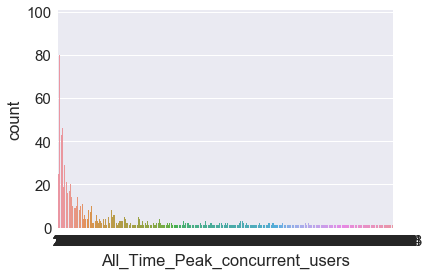

In [137]:
sns.countplot(y)

In [128]:
import statsmodels.api as sm

In [139]:
# Create your model
model = sm.OLS(np.log(y),np.nan_to_num(x))

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     All_Time_Peak_concurrent_users   R-squared:                       0.622
Model:                                        OLS   Adj. R-squared:                  0.580
Method:                             Least Squares   F-statistic:                     14.72
Date:                            Tue, 29 May 2018   Prob (F-statistic):               0.00
Time:                                    15:28:54   Log-Likelihood:                -12604.
No. Observations:                            7295   AIC:                         2.668e+04
Df Residuals:                                6560   BIC:                         3.175e+04
Df Model:                                     734                                         
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0053      0.007      0.787      0.431      -0.008       0.018
x2             0.0066      0.001      9.078      0.000       0.005       0.008
x3             0.0061      0.001      7.734      0.000       0.005       0.008
x4          2.694e-06   5.82e-07      4.628      0.000    1.55e-06    3.83e-06
x5            -0.0006      0.007     -0.090      0.928      -0.014       0.012
x6             0.0107      0.001     15.699      0.000       0.009       0.012
x7          1.918e-05   5.21e-05      0.368      0.713   -8.29e-05       0.000
x8             0.0049      0.001      4.337      0.000       0.003       0.007
x9            -0.3381      0.233     -1.453      0.146      -0.794       0.118
x10            0.0502      0.190      0.264      0.792      -0.323       0.423
x11            0.1319      0.069      1.911      0.056      -0.003       0.267
x12            0.1770      0.218      0.811      0.417      -0.251       0.605
x13           -0.2496      0.264     -0.947      0.344      -0.766       0.267
x14            0.2270      0.201      1.131      0.258      -0.167       0.621
x15            0.0476      0.218      0.218      0.827      -0.380       0.476
x16           -1.1365      0.408     -2.788      0.005      -1.936      -0.337
x17            0.0767      0.291      0.264      0.792      -0.493       0.646
x18           -0.0327      0.015     -2.249      0.025      -0.061      -0.004
x19            0.0293      0.066      0.446      0.656      -0.100       0.158
x20            0.2146      0.068      3.176      0.002       0.082       0.347
x21            0.7394      0.267      2.771      0.006       0.216       1.262
x22           -0.0998      0.162     -0.616      0.538      -0.417       0.218
x23            0.1925      0.126      1.533      0.125      -0.054       0.439
x24            0.7052      0.301      2.340      0.019       0.115       1.296
x25            0.0730      0.045      1.631      0.103      -0.015       0.161
x26            0.0388      0.089      0.435      0.663      -0.136       0.213
x27           -0.0193      0.065     -0.297      0.767      -0.146       0.108
x28            0.1001      0.098      1.022      0.307      -0.092       0.292
x29           -0.1526      0.236     -0.647      0.518      -0.615       0.310
x30            0.4529      0.209      2.164      0.031       0.043       0.863
x31            0.1680      0.317      0.529      0.597      -0.454       0.790
x32           -0.7127      0.353     -2.017      0.044      -1.405      -0.020
x33            0.1566      0.065      2.394      0.017       0.028       0.285
x34            0.0478      0.330      0.145      0.885      -0.599       0.694
x35            0.0925      0

In [85]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
        
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)
    
    plt.subplot(1, 3, 1)
    plt.scatter(x.overall_reviews_n,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [86]:
len(np.isfinite(x))
x.size
x.overall_reviews_n

0         15
1         19
2        272
3         54
4         80
5       1387
6         25
7         38
8          0
9         12
10       794
11       794
12       296
13        14
14        30
15      1292
16      5442
17       330
18        43
19      1726
20      1908
21      1486
22       634
23       241
24       199
25        84
26        15
27       115
28      1326
29         0
        ... 
7265     535
7266     347
7267    1123
7268      65
7269     135
7270      54
7271      15
7272     112
7273      27
7274      59
7275    2028
7276     722
7277     829
7278     519
7279     154
7280     140
7281     372
7282     449
7283     879
7284    3582
7285    1088
7286    1302
7287     567
7288     478
7289     524
7290      49
7291     852
7292     334
7293      35
7294    1317
Name: overall_reviews_n, Length: 7295, dtype: int64

In [140]:
np.nan_to_num(x)

array([[ 3.99,  0.  , 46.  , ...,  0.  ,  0.  ,  0.  ],
       [ 4.99,  0.  , 47.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.99,  0.  , 90.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [14.99,  0.  , 79.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 94.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 35.  , ...,  0.  ,  0.  ,  0.  ]])

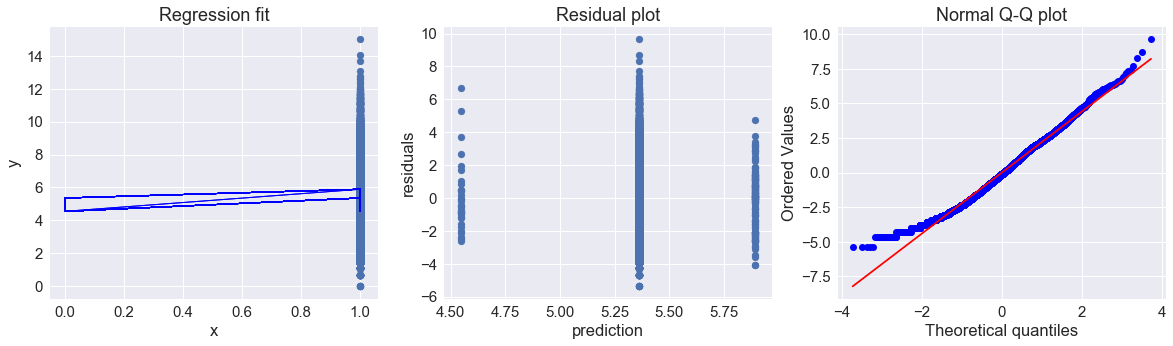

In [88]:
diagnostic_plot(np.isfinite(x),np.log(y))

Text(0.5,1,'Normal Q-Q plot')

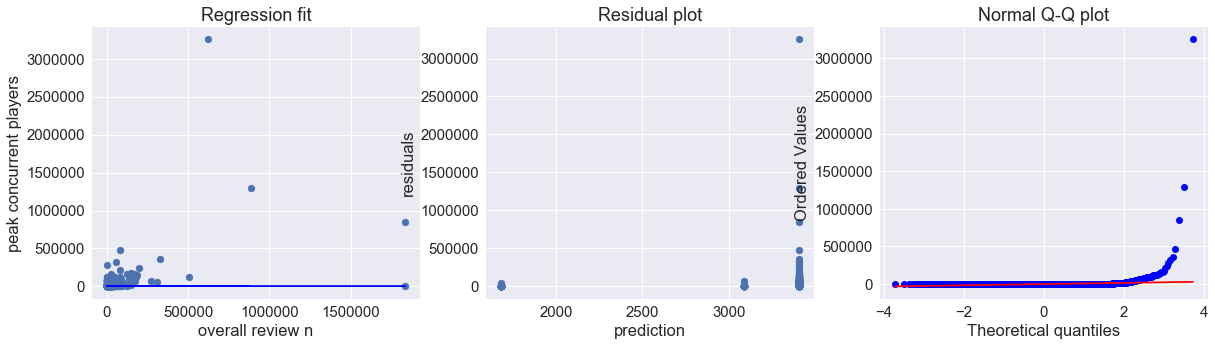

In [276]:
plt_x = np.isfinite(x)
scatter_x = x.overall_reviews_n
plt_y = y

plt.figure(figsize=(20,5))

rgr = LinearRegression()
rgr.fit(plt_x,plt_y)
pred = rgr.predict(plt_x)

plt.subplot(1, 3, 1)
plt.scatter(scatter_x,plt_y)
plt.plot(scatter_x, pred, color='blue',linewidth=1)
plt.title("Regression fit")
plt.xlabel("overall review n")
plt.ylabel("peak concurrent players")

plt.subplot(1, 3, 2)
res = plt_y - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

plt.subplot(1, 3, 3)
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [279]:
# calculating r-squared

# back-transforming y

# len(pred)
y_pred = exp(pred)

# rsquared = 1-SSE/SST = SSR/SST

ybar = np.mean(y)
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((y - ybar)**2)
rsquared = SSR / SST
print(rsquared)

inf


In [280]:
# rsquared = 1-SSE/SST = SSR/SST

y_pred = exp(pred)

ybar = np.mean(y)
SSR = np.sum((y_pred - ybar)**2)
SST = np.sum((y - ybar)**2)
rsquared = SSR / SST
print(rsquared, SSR, SST)

inf inf 14361864849021.52


In [ ]:
# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(np.isfinite(x),y)

# Plot your predicted values on the x-axis, and your residuals on the y-axis

data['predict']=fit.predict(np.isfinite(x))
data['resid']=data.cnt-data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))